f(x,y)=(1 - x / 2 + x ** 5 + y ** 3) * exp(-x ** 2 - y ** 2)
Input the interval [a1,b1] of x
-2.5 -0.5
Input the interval [a2,b2] of y
-2.5 2.5


/home/qwq/anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


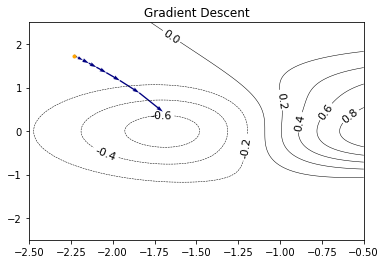

<Figure size 1200x800 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch import exp,log,sin,cos,tensor
import random

#测试用例1 (1 - x / 2 + x ** 5 + y ** 3) * exp(-x ** 2 - y ** 2) [-2.5,-0.5] [-2.5,2.5]
#测试用例2 x**2/100+y**2 [6,12] [-2,2]

f_expr = input("f(x,y)=") #读入二元函数表达式
f = lambda x,y:eval(f_expr)
intx = input("Input the interval [a1,b1] of x\n") #读入x和y的区间
inty = input("Input the interval [a2,b2] of y\n")
a1,b1 = float(intx.split(' ')[0]),float(intx.split(' ')[1])
a2,b2 = float(inty.split(' ')[0]),float(inty.split(' ')[1])

n_points = 50 #长度为1的区间内取多少采样点
#x[i][j]和y[i][j]分别表示第i行第j列的采样点的x值与y值
x, y = np.meshgrid(np.linspace(a1, b1, int(n_points * (b1 - a1))),
                   np.linspace(b2, a2, int(n_points * (b2 - a2))))

#根据输入的函数计算所有的z值，为等高线图作准备
z = np.zeros(x.shape)
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        #这里不需要进行自动求导，构造的torch张量就不需要计算梯度了，提高计算速度
        z[i][j] = f(tensor(x[i][j],requires_grad = False),tensor(y[i][j],requires_grad = False)).numpy()

#首先绘制等高线图
plt.figure('Gradient Descent')
plt.title('Gradient Descent')
fig = plt.contour(x, y, z, 8, colors = 'black', linewidths = 0.5)
plt.clabel(fig, inline_spacing = 0.5, fmt = '%.1f', fontsize = 11)

lr,eps,max_n = 0.8,1e-3,8 #学习率，最小梯度阈值，最大梯度下降次数
random.seed(1) #固定随机种子便于调试
#用区间内的随机值初始化x0和y0
x0_v,y0_v = random.uniform(a1,b1),random.uniform(a2,b2)
#x0_v,y0_v = 1.0,1.0
plt.plot(x0_v,y0_v,marker = 'o',color = 'orange',markersize = 3) #画出起始点
x0 = tensor(x0_v,requires_grad = True)
y0 = tensor(y0_v,requires_grad = True)
x,y,dx,dy = [],[],[],[] #梯度下降过程数据
#开始梯度下降过程
for i in range(max_n):
    z0 = f(x0,y0)
    #自动求导
    z0.backward()
    
    #x,y以及二者偏导数的值，去掉torch计算的梯度
    x_v,y_v,x_g,y_g = x0.detach().numpy(),y0.detach().numpy(),x0.grad.detach().numpy(),y0.grad.detach().numpy()
    x.append(x_v)
    y.append(y_v)
    dx.append(- lr * x_g)
    dy.append(-lr * y_g)
    #梯度约等于0可以视为局部最优解
    if (x_v ** 2 + y_v ** 2) ** 0.5 < eps:
        break
    #重新构造torch张量，为下次梯度计算做准备
    x0 = tensor(x_v - lr * x_g,requires_grad = True)
    y0 = tensor(y_v - lr * y_g,requires_grad = True)

#画出梯度下降过程图
plt.quiver(x,y,dx,dy,angles = 'xy', scale_units = 'xy',scale = 1,width = 0.004,color = '#000080')
plt.figure(dpi = 200)
plt.show()

$\textbf{题目：}f(X)=-ln(|X|),其中X为方阵,求\nabla f.\\
\textbf{解答：}不妨设X为n阶方阵，则|X|=\Sigma_{i=1}^{n}\Sigma_{j=1}^{n}(-1)^{i+j}X_{ij}M_{ij}，其中M_{ij}为i,j处代数余子式.\\
对于矩阵X的任意元素X_{ij}，有\frac{\partial |X|}{\partial X_{ij}}=(-1)^{i+j}M_{ij}=X^*_{ji}.\\
则有\nabla_X |X|=(X^*)^T，则\nabla f=-\frac{1}{|X|}\nabla_X |X|=-\frac{1}{|X|}|X|(X^{-1})^T=-(X^{-1})^T$